<a href="https://colab.research.google.com/github/prometricas/Abeba_Mineria/blob/main/ACT_MINERIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Etapa 1. Selección de datos**
En esta etapa se selecciona el conjunto de datos y se realiza una revisión inicial para confirmar estructura, tipos de variables y variable objetivo (*churn*). El dataset **Bank Customer Churn Prediction.csv** contiene 10 mil registros con variables demográficas y financieras, además de la etiqueta binaria **churn (0/1)**.


In [1]:

## 1.1 Configuración del Entorno

# Importo librerías base para análisis y visualización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuro reproducibilidad y salida más legible en pantalla
np.random.seed(42)
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# Mantengo un estilo limpio para gráficos (sin recargar el notebook)
plt.style.use("seaborn-v0_8-whitegrid")

print("Entorno configurado correctamente")
print(f"pandas: {pd.__version__} | numpy: {np.__version__}")


## 1.2 Carga del Dataset

import os
from google.colab import files

# Defino el nombre esperado del archivo
DATA_FILE = "Bank Customer Churn Prediction.csv"

# Si el archivo no está en el entorno, lo cargo manualmente desde el equipo
if not os.path.exists(DATA_FILE):
    print("Archivo no encontrado en /content. Cargo el CSV manualmente...")
    uploaded = files.upload()
    # Si el archivo subido tiene otro nombre, tomo el primero disponible
    DATA_FILE = next(iter(uploaded.keys()))

# Cargo el dataset
df_raw = pd.read_csv(DATA_FILE)

print("Dataset cargado exitosamente")
print(f"Dimensiones: {df_raw.shape[0]} filas × {df_raw.shape[1]} columnas")


## 1.3 Exploración Inicial del Dataset

# Reviso una muestra para confirmar estructura y nombres
print("=" * 80)
print("PRIMERAS 10 FILAS DEL DATASET")
print("=" * 80)
display(df_raw.head(10))

# Valido tipos de dato y conteos no nulos
print("\n" + "=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
df_raw.info()

# Resumo variables numéricas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 80)
display(df_raw.describe())

# Resumo variables categóricas (objetos)
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 80)
display(df_raw.describe(include=["object"]))

# Verifico distribución de la variable objetivo (churn)
print("\n" + "=" * 80)
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (CHURN)")
print("=" * 80)

churn_dist = (
    df_raw["churn"]
    .value_counts(dropna=False)
    .rename_axis("churn")
    .to_frame("frecuencia")
)
churn_dist["porcentaje"] = (churn_dist["frecuencia"] / churn_dist["frecuencia"].sum() * 100).round(2)

display(churn_dist)

# Defino variables de trabajo para mantener trazabilidad desde el inicio
target_col = "churn"
id_cols = ["customer_id"]  # identificador sin aporte predictivo directo

# Separo predictores (X) y objetivo (y) sin transformar todavía
X_raw = df_raw.drop(columns=[target_col])
y_raw = df_raw[target_col].astype(int)

# Identifico listas de variables numéricas y categóricas para etapas posteriores
cat_cols = X_raw.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_raw.select_dtypes(exclude=["object"]).columns.tolist()

# Excluyo el id de la lista numérica (se decide retirarlo del modelado más adelante)
num_cols = [c for c in num_cols if c not in id_cols]

print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)
print("Columna objetivo:", target_col)

Entorno configurado correctamente
pandas: 2.2.2 | numpy: 2.0.2
Archivo no encontrado en /content. Cargo el CSV manualmente...


Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv
Dataset cargado exitosamente
Dimensiones: 10000 filas × 12 columnas
PRIMERAS 10 FILAS DEL DATASET


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0



INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS


,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457



DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (CHURN)


,frecuencia,porcentaje
churn,,
0,7963,79.63
1,2037,20.37


Columnas categóricas: ['country', 'gender']
Columnas numéricas: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
Columna objetivo: churn


# **Etapa 2. Preprocesamiento de datos**
En esta etapa dejo el dataset listo y confiable: reviso faltantes, duplicados, posibles outliers y limpio variables categóricas.


ETAPA 2 - PREPROCESAMIENTO
Dimensiones iniciales: 10000 filas × 12 columnas
Variables categóricas: ['country', 'gender']
Variables numéricas (sin id/target): ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

ANÁLISIS DE VALORES FALTANTES

No se encontraron valores faltantes en el dataset.

Total de filas con al menos un valor faltante: 0 (0.00%)

TRATAMIENTO DE VALORES FALTANTES
No se requiere imputación: el dataset no tiene valores faltantes.

IDENTIFICACIÓN Y ELIMINACIÓN DE DUPLICADOS
Registros duplicados encontrados: 0 (0.0000%)
No se encontraron duplicados.

DETECCIÓN Y TRATAMIENTO DE OUTLIERS (IQR)


,Variable,Q1,Q3,IQR,Límite Inferior,Límite Superior,N° Outliers,% Outliers
1,age,32.00,44.0000,12.0000,14.00000,62.00000,359,3.59
4,products_number,1.00,2.0000,1.0000,-0.50000,3.50000,60,0.60
0,credit_score,584.00,718.0000,134.0000,383.00000,919.00000,15,0.15
2,tenure,3.00,7.0000,4.0000,-3.00000,13.00000,0,0.00
3,balance,0.00,127644.2400,127644.2400,-191466.36000,319110.60000,0,0.00
5,credit_card,0.00,1.0000,1.0000,-1.50000,2.50000,0,0.00
6,active_member,0.00,1.0000,1.0000,-1.50000,2.50000,0,0.00
7,estimated_salary,51002.11,149388.2475,98386.1375,-96577.09625,296967.45375,0,0.00



Valores ajustados por clipping (acumulado): 434


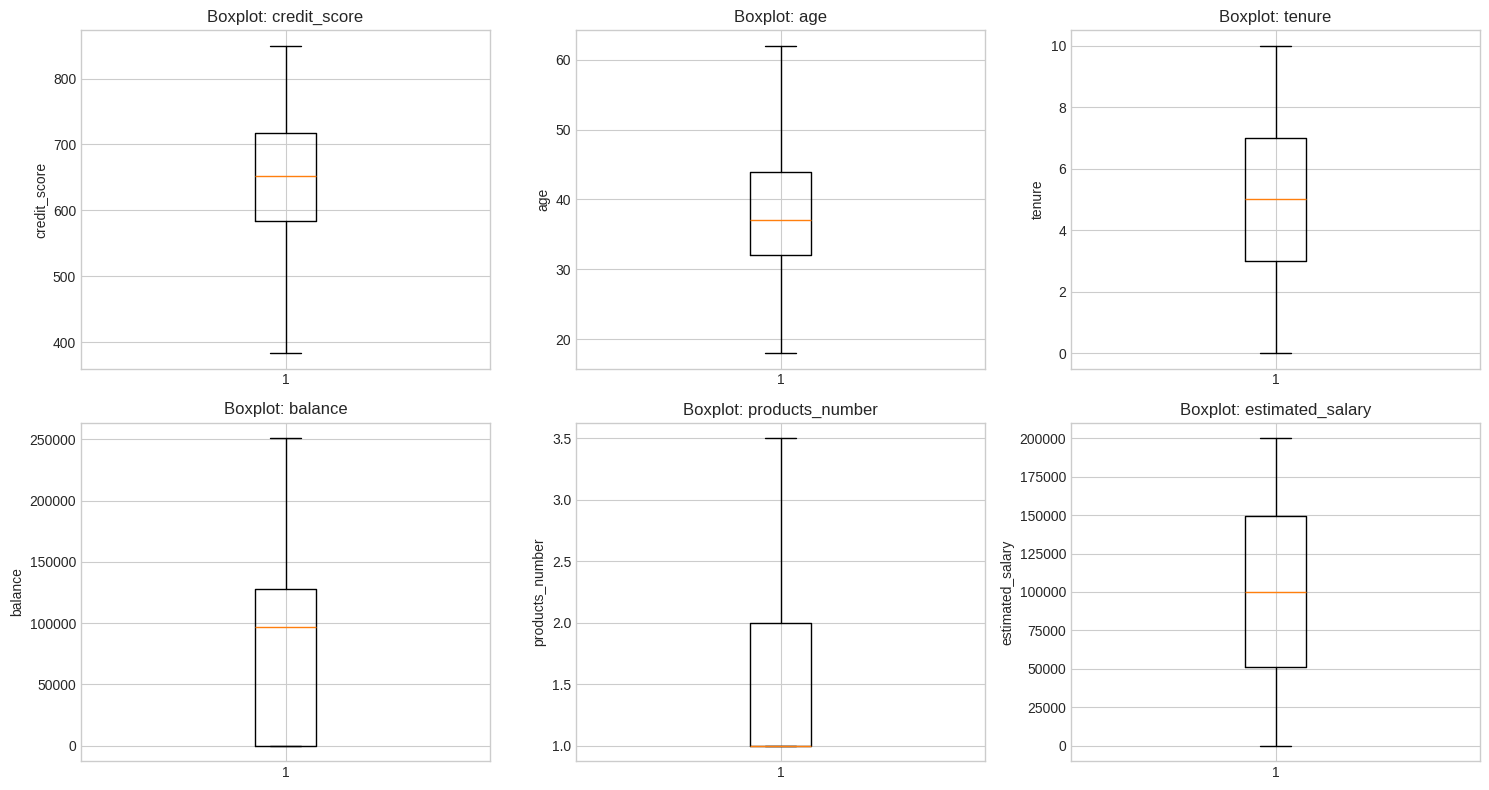


LIMPIEZA DE DATOS CATEGÓRICOS Y NORMALIZACIÓN DE TIPOS

Revisión de categorías por variable:

country:


,count
country,
France,5014
Germany,2509
Spain,2477



gender:


,count
gender,
Male,5457
Female,4543



Limpieza aplicada: strip() en categóricas y capitalización en 'gender'/'country' si existen.

Verificación rápida de tipos:


,dtype
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,float64
credit_card,int64
active_member,int64



Distribución objetivo (churn):


,frecuencia
churn,
0,7963
1,2037



Dimensiones finales (post-preprocesamiento): (10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1.0,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3.0,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2.0,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1.0,1,1,79084.10,0


In [4]:
# -------------------------------------------------------------------------
# Inicialización (copio el dataframe para no tocar el crudo)
# -------------------------------------------------------------------------
try:
    df = df_raw.copy()
except NameError:
    df = pd.read_csv("Bank Customer Churn Prediction.csv")

target_col = "churn"
id_cols = ["customer_id"]

variables_categoricas = df.select_dtypes(include=["object"]).columns.tolist()
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
variables_numericas = [c for c in variables_numericas if c not in (id_cols + [target_col])]

print("=" * 80)
print("ETAPA 2 - PREPROCESAMIENTO")
print("=" * 80)
print(f"Dimensiones iniciales: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"Variables categóricas: {variables_categoricas}")
print(f"Variables numéricas (sin id/target): {variables_numericas}")

# =============================================================================
# 2.1 Análisis de Valores Faltantes
# =============================================================================
print("\n" + "=" * 80)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 80)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df) * 100).round(2)

missing_df = (
    pd.DataFrame({"Valores Faltantes": missing_values, "Porcentaje (%)": missing_percentage})
    .query("`Valores Faltantes` > 0")
    .sort_values("Valores Faltantes", ascending=False)
)

if len(missing_df) > 0:
    print("\nColumnas con valores faltantes:")
    display(missing_df)

    # Visualizo rápidamente el porcentaje de faltantes para priorizar tratamiento
    ax = missing_df["Porcentaje (%)"].sort_values().plot(kind="barh", figsize=(9, 4))
    ax.set_xlabel("Porcentaje de Valores Faltantes (%)")
    ax.set_title("Valores faltantes por variable")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo se encontraron valores faltantes en el dataset.")

filas_con_missing = df.isnull().any(axis=1).sum()
print(f"\nTotal de filas con al menos un valor faltante: {filas_con_missing} ({(filas_con_missing/len(df)*100):.2f}%)")

# =============================================================================
# 2.2 Tratamiento de Valores Faltantes
# =============================================================================
print("\n" + "=" * 80)
print("TRATAMIENTO DE VALORES FALTANTES")
print("=" * 80)

columns_with_missing = df.columns[df.isnull().any()].tolist()

if len(columns_with_missing) == 0:
    print("No se requiere imputación: el dataset no tiene valores faltantes.")
else:
    print("Estrategia aplicada:")
    print("- Variables categóricas: imputación con moda")
    print("- Variables numéricas: imputación con mediana (más robusta frente a outliers)")

    for col in columns_with_missing:
        miss_count = int(df[col].isnull().sum())
        if df[col].dtype == "object":
            mode_value = df[col].mode(dropna=True)[0]
            df[col] = df[col].fillna(mode_value)
            print(f"  - '{col}': {miss_count} imputados con moda = '{mode_value}'")
        else:
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)
            print(f"  - '{col}': {miss_count} imputados con mediana = {median_value}")

    print(f"\nVerificación post-imputación: faltantes restantes = {int(df.isnull().sum().sum())}")

# =============================================================================
# 2.3 Identificación y Eliminación de Duplicados
# =============================================================================
print("\n" + "=" * 80)
print("IDENTIFICACIÓN Y ELIMINACIÓN DE DUPLICADOS")
print("=" * 80)

duplicados = int(df.duplicated().sum())
print(f"Registros duplicados encontrados: {duplicados} ({(duplicados/len(df)*100):.4f}%)")

if duplicados > 0:
    # Muestro una muestra para validar la causa de duplicación antes de eliminar
    print("\nEjemplo de duplicados (muestra):")
    display(df[df.duplicated(keep=False)].head(10))

    filas_antes = len(df)
    df = df.drop_duplicates().reset_index(drop=True)
    filas_despues = len(df)

    print(f"\nFilas antes: {filas_antes} | Filas después: {filas_despues} | Eliminadas: {filas_antes - filas_despues}")
else:
    print("No se encontraron duplicados.")

# =============================================================================
# 2.4 Detección y Tratamiento de Outliers
# =============================================================================
print("\n" + "=" * 80)
print("DETECCIÓN Y TRATAMIENTO DE OUTLIERS (IQR)")
print("=" * 80)

def detectar_outliers_iqr(data: pd.DataFrame, column: str):
    # Calculo límites IQR para identificar valores atípicos (Q1-1.5*IQR, Q3+1.5*IQR)
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    mask = (data[column] < lim_inf) | (data[column] > lim_sup)
    return lim_inf, lim_sup, mask

# Reporto outliers y aplico un tratamiento conservador (clipping) solo si tiene sentido
# (evito eliminar filas para no perder información)
outliers_summary = []
clipped_total = 0

# Excluyo variables binarias (solo 0/1) del clipping: no aporta en este caso
bin_cols = [c for c in variables_numericas if set(df[c].dropna().unique()).issubset({0, 1})]

for col in variables_numericas:
    lim_inf, lim_sup, mask = detectar_outliers_iqr(df, col)
    n_outliers = int(mask.sum())
    pct_outliers = round(n_outliers / len(df) * 100, 3)

    outliers_summary.append({
        "Variable": col,
        "Q1": float(df[col].quantile(0.25)),
        "Q3": float(df[col].quantile(0.75)),
        "IQR": float(df[col].quantile(0.75) - df[col].quantile(0.25)),
        "Límite Inferior": float(lim_inf),
        "Límite Superior": float(lim_sup),
        "N° Outliers": n_outliers,
        "% Outliers": pct_outliers
    })

    # Trato outliers por clipping solo en variables no binarias y con iqr > 0
    if (col not in bin_cols) and (df[col].quantile(0.75) - df[col].quantile(0.25) > 0) and (n_outliers > 0):
        before = df[col].copy()
        df[col] = df[col].clip(lower=lim_inf, upper=lim_sup)
        clipped = int((before != df[col]).sum())
        clipped_total += clipped

outliers_df = pd.DataFrame(outliers_summary).sort_values("% Outliers", ascending=False)
display(outliers_df)

print(f"\nValores ajustados por clipping (acumulado): {clipped_total}")

# Visualizo boxplots (máximo 6) para una inspección rápida
cols_box = [c for c in variables_numericas if c not in bin_cols]
cols_box = cols_box[:6]

if len(cols_box) > 0:
    rows = 2 if len(cols_box) > 3 else 1
    cols = 3 if len(cols_box) > 1 else 1
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
    axes = np.array(axes).reshape(-1)

    for i, col in enumerate(cols_box):
        axes[i].boxplot(df[col].dropna(), vert=True)
        axes[i].set_title(f"Boxplot: {col}")
        axes[i].set_ylabel(col)

    # Elimino ejes sobrantes si los hay
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# =============================================================================
# 2.6 Limpieza de Datos Categóricos
# =============================================================================
print("\n" + "=" * 80)
print("LIMPIEZA DE DATOS CATEGÓRICOS Y NORMALIZACIÓN DE TIPOS")
print("=" * 80)

# Reviso categorías únicas para identificar inconsistencias típicas (espacios, mayúsculas)
if len(variables_categoricas) > 0:
    print("\nRevisión de categorías por variable:")
    for col in variables_categoricas:
        print(f"\n{col}:")
        display(df[col].value_counts(dropna=False))

    # Limpieza mínima: quito espacios y estandarizo formato para consistencia
    for col in variables_categoricas:
        df[col] = df[col].astype(str).str.strip()

    # Estandarizo valores comunes (sin forzar cambios innecesarios)
    if "gender" in df.columns:
        df["gender"] = df["gender"].str.capitalize()
    if "country" in df.columns:
        df["country"] = df["country"].str.capitalize()

    print("\nLimpieza aplicada: strip() en categóricas y capitalización en 'gender'/'country' si existen.")
else:
    print("No hay variables categóricas para limpiar.")

# Normalizo tipos: objetivo y binarias como enteros 0/1
if target_col in df.columns:
    df[target_col] = df[target_col].astype(int)

for col in ["credit_card", "active_member"]:
    if col in df.columns:
        df[col] = df[col].astype(int)

print("\nVerificación rápida de tipos:")
display(df.dtypes.to_frame("dtype"))

print("\nDistribución objetivo (churn):")
display(df[target_col].value_counts().rename_axis(target_col).to_frame("frecuencia"))

print("\nDimensiones finales (post-preprocesamiento):", df.shape)
display(df.head(5))

# **Etapa 3. Transformación de datos**
En esta etapa convierto el dataset a un formato listo para modelado:
codifico variables categóricas, escalo variables numéricas y preparo una alternativa con reducción de dimensionalidad (PCA).

ETAPA 3 - TRANSFORMACIÓN DE DATOS
Dimensiones de entrada: (10000, 12)

CODIFICACIÓN DE VARIABLES CATEGÓRICAS

Variables categóricas a codificar: 2
  - country: 3 categorías


,frecuencia
country,
France,5014
Germany,2509
Spain,2477


  - gender: 2 categorías


,frecuencia
gender,
Male,5457
Female,4543



--------------------------------------------------
Aplicando One-Hot Encoding (pd.get_dummies):
  - Variables codificadas: ['country', 'gender']

Dimensiones después de codificación: (10000, 13)


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male,churn
0,15634602,619,42,2,0.00,1.0,1,1,101348.88,False,False,False,1
1,15647311,608,41,1,83807.86,1.0,0,1,112542.58,False,True,False,0
2,15619304,502,42,8,159660.80,3.0,1,0,113931.57,False,False,False,1
3,15701354,699,39,1,0.00,2.0,0,0,93826.63,False,False,False,0
4,15737888,850,43,2,125510.82,1.0,1,1,79084.10,False,True,False,0



NORMALIZACIÓN Y ESTANDARIZACIÓN

Variables derivadas creadas (si aplican):
  - balance_salary_ratio
  - tenure_age_ratio

Variables numéricas a escalar:
  - credit_score: [383.0000, 850.0000]
  - age: [18.0000, 62.0000]
  - tenure: [0.0000, 10.0000]
  - balance: [0.0000, 250898.0900]
  - products_number: [1.0000, 3.5000]
  - credit_card: [0.0000, 1.0000]
  - active_member: [0.0000, 1.0000]
  - estimated_salary: [11.5800, 199992.4800]
  - balance_salary_ratio: [0.0000, 10614.6545]
  - tenure_age_ratio: [0.0000, 0.5556]

--------------------------------------------------
Aplicando StandardScaler (Z-score normalization):


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,balance_salary_ratio,tenure_age_ratio
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-2.7711,-2.1199,-1.7333,-1.2258,-0.9248,-1.5478,-1.0307,-1.7403,-0.0358,-1.5465
25%,-0.6894,-0.6834,-0.6960,-1.2258,-0.9248,-1.5478,-1.0307,-0.8536,-0.0358,-0.8247
50%,0.0149,-0.1704,-0.0044,0.3320,-0.9248,0.6461,0.9702,0.0018,-0.0289,-0.0872
75%,0.6985,0.5478,0.6871,0.8199,0.8294,0.6461,0.9702,0.8572,-0.0218,0.6911
max,2.0656,2.3947,1.7245,2.7953,3.4607,0.6461,0.9702,1.7372,97.9470,4.6690



--------------------------------------------------
Aplicando MinMaxScaler (normalización 0-1):


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,balance_salary_ratio,tenure_age_ratio
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,0.5729,0.4696,0.5013,0.3048,0.2109,0.7055,0.5151,0.5004,0.0004,0.2488
std,0.2068,0.2215,0.2892,0.2487,0.2280,0.4558,0.4998,0.2876,0.0102,0.1609
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.4304,0.3182,0.3000,0.0000,0.0000,0.0000,0.0000,0.2550,0.0000,0.1161
50%,0.5760,0.4318,0.5000,0.3874,0.0000,1.0000,1.0000,0.5010,0.0001,0.2348
75%,0.7173,0.5909,0.7000,0.5087,0.4000,1.0000,1.0000,0.7470,0.0001,0.3600
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000



Dataset final para modelado (df_final): (10000, 14)


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male,churn,balance_salary_ratio,tenure_age_ratio
0,-0.326878,0.342615,-1.041760,-1.225848,-0.924827,0.646092,0.970243,0.021886,False,False,False,1,-0.035804,-1.013742
1,-0.440804,0.240011,-1.387538,0.117350,-0.924827,-1.547768,0.970243,0.216534,False,True,False,0,-0.028930,-1.273625
2,-1.538636,0.342615,1.032908,1.333053,2.583620,0.646092,-1.030670,0.240687,False,False,False,1,-0.022868,0.584540
3,0.501675,0.034803,-1.387538,-1.225848,0.829397,-1.547768,-1.030670,-0.108918,False,False,False,0,-0.035804,-1.259632
4,2.065569,0.445219,-1.041760,0.785728,-0.924827,0.646092,0.970243,-0.365276,False,True,False,0,-0.021154,-1.026132



REDUCCIÓN DE DIMENSIONALIDAD CON PCA

Dimensiones originales: 13 características
Componentes necesarios para explicar 95% de varianza: 10


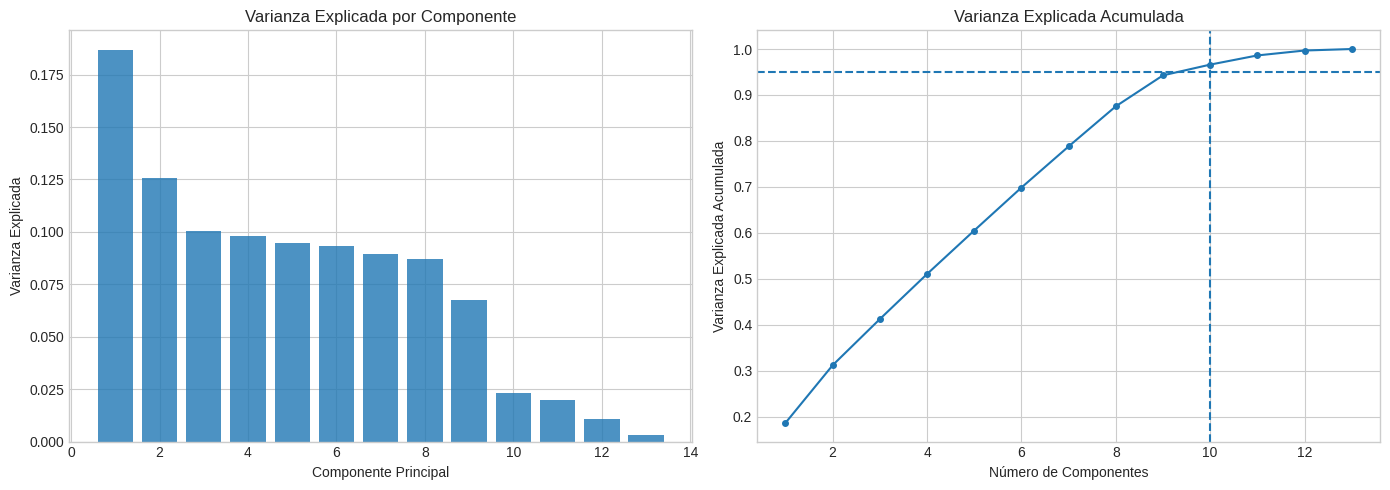


Dimensiones reducidas: 10 componentes principales
Varianza total explicada: 96.61%

Dataset con PCA (df_pca): (10000, 11)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,churn
0,-1.505583,-0.454702,0.356467,0.045286,-0.632052,0.523631,-0.180695,0.759919,-1.450459,-0.618470,1
1,-2.029982,0.451001,0.047630,0.809373,0.287753,-1.319844,-0.209381,0.881171,-0.716607,-0.438311,0
2,1.129890,-0.618001,-0.667697,-0.439777,-1.599576,-0.243322,0.712133,-0.673671,2.745948,-0.401909,1
3,-1.656037,-1.576978,-0.628034,-0.188100,1.218215,-1.243601,0.005197,-0.847708,-0.278053,-0.530516,0
4,-1.650800,0.906546,1.031435,0.381056,1.337173,1.606609,-0.469562,0.060978,-0.320152,-0.412374,0


In [5]:
from IPython.display import display

# -------------------------------------------------------------------------
# Inicialización (tomo el dataframe preprocesado de la etapa 2)
# -------------------------------------------------------------------------
try:
    df_work = df.copy()
except NameError:
    df_work = pd.read_csv("Bank Customer Churn Prediction.csv")

target_col = "churn"
id_cols = ["customer_id"]

print("=" * 80)
print("ETAPA 3 - TRANSFORMACIÓN DE DATOS")
print("=" * 80)
print(f"Dimensiones de entrada: {df_work.shape}")

# =============================================================================
# 3.1 Codificación de Variables Categóricas
# =============================================================================
print("\n" + "=" * 80)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 80)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # mantengo consistencia con el guion de referencia

# Identifico variables categóricas (tipo objeto) excluyendo la variable objetivo
categorical_cols = [c for c in df_work.select_dtypes(include=["object"]).columns]
print(f"\nVariables categóricas a codificar: {len(categorical_cols)}")
for c in categorical_cols:
    print(f"  - {c}: {df_work[c].nunique()} categorías")
    display(df_work[c].value_counts().head(10).rename("frecuencia").to_frame())

# Creo copia para codificación
df_encoded = df_work.copy()

# Estrategia:
# - One-Hot Encoding para variables con pocas categorías (aplica perfecto en este dataset)
cols_onehot = [c for c in categorical_cols if df_encoded[c].nunique() <= 10]

print("\n" + "-" * 50)
print("Aplicando One-Hot Encoding (pd.get_dummies):")

if len(cols_onehot) > 0:
    df_encoded = pd.get_dummies(df_encoded, columns=cols_onehot, drop_first=True)
    print(f"  - Variables codificadas: {cols_onehot}")
else:
    print("  - No se encontraron variables para One-Hot Encoding")

# Mantengo la columna objetivo al final por orden y lectura
if target_col in df_encoded.columns:
    cols = [c for c in df_encoded.columns if c != target_col] + [target_col]
    df_encoded = df_encoded[cols]

print(f"\nDimensiones después de codificación: {df_encoded.shape}")
display(df_encoded.head(5))

# =============================================================================
# 3.2 Normalización y Estandarización
# =============================================================================
print("\n" + "=" * 80)
print("NORMALIZACIÓN Y ESTANDARIZACIÓN")
print("=" * 80)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Creo variables derivadas sencillas para enriquecer el modelado (sin recargar el pipeline)
# Nota: uso un epsilon para evitar divisiones por cero si llegaran a existir valores extremos.
eps = 1e-6
if {"balance", "estimated_salary"}.issubset(df_encoded.columns):
    df_encoded["balance_salary_ratio"] = df_encoded["balance"] / (df_encoded["estimated_salary"] + eps)

if {"tenure", "age"}.issubset(df_encoded.columns):
    df_encoded["tenure_age_ratio"] = df_encoded["tenure"] / (df_encoded["age"] + eps)

print("\nVariables derivadas creadas (si aplican):")
for c in ["balance_salary_ratio", "tenure_age_ratio"]:
    if c in df_encoded.columns:
        print(f"  - {c}")

# Identifico columnas numéricas para escalar (excluyo id y objetivo)
numeric_cols_to_scale = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_to_scale = [c for c in numeric_cols_to_scale if c not in (id_cols + [target_col])]

print("\nVariables numéricas a escalar:")
for c in numeric_cols_to_scale:
    vmin, vmax = df_encoded[c].min(), df_encoded[c].max()
    print(f"  - {c}: [{vmin:.4f}, {vmax:.4f}]")

# Elimino el identificador del conjunto de modelado (no aporta valor predictivo directo)
df_model_base = df_encoded.drop(columns=[c for c in id_cols if c in df_encoded.columns]).copy()

# Estandarización (Z-score): media=0, std=1
print("\n" + "-" * 50)
print("Aplicando StandardScaler (Z-score normalization):")

scaler = StandardScaler()
df_standardized = df_model_base.copy()
df_standardized[numeric_cols_to_scale] = scaler.fit_transform(df_standardized[numeric_cols_to_scale])

display(df_standardized[numeric_cols_to_scale].describe().round(4))

# Normalización alternativa (0-1) para comparación rápida
print("\n" + "-" * 50)
print("Aplicando MinMaxScaler (normalización 0-1):")

minmax_scaler = MinMaxScaler()
df_normalized = df_model_base.copy()
df_normalized[numeric_cols_to_scale] = minmax_scaler.fit_transform(df_normalized[numeric_cols_to_scale])

display(df_normalized[numeric_cols_to_scale].describe().round(4))

# Defino el dataset final para modelado (mantengo el estandarizado como base)
df_final = df_standardized.copy()

print(f"\nDataset final para modelado (df_final): {df_final.shape}")
display(df_final.head(5))

# =============================================================================
# 3.3 Reducción de Dimensionalidad con PCA
# =============================================================================
print("\n" + "=" * 80)
print("REDUCCIÓN DE DIMENSIONALIDAD CON PCA")
print("=" * 80)

from sklearn.decomposition import PCA

# Preparo matrices para PCA (excluyo variable objetivo)
X_for_pca = df_final.drop(columns=[target_col])
y = df_final[target_col].astype(int)

print(f"\nDimensiones originales: {X_for_pca.shape[1]} características")

# PCA con todos los componentes para analizar varianza explicada
pca_full = PCA()
pca_full.fit(X_for_pca)

var_exp = pca_full.explained_variance_ratio_
var_cum = np.cumsum(var_exp)

# Selecciono el número de componentes que explica al menos 95% de la varianza
n_components_95 = int(np.argmax(var_cum >= 0.95) + 1)
print(f"Componentes necesarios para explicar 95% de varianza: {n_components_95}")

# Visualizo varianza explicada (individual y acumulada)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(1, len(var_exp) + 1), var_exp, alpha=0.8)
axes[0].set_xlabel("Componente Principal")
axes[0].set_ylabel("Varianza Explicada")
axes[0].set_title("Varianza Explicada por Componente")

axes[1].plot(range(1, len(var_cum) + 1), var_cum, marker="o", markersize=4)
axes[1].axhline(y=0.95, linestyle="--")
axes[1].axvline(x=n_components_95, linestyle="--")
axes[1].set_xlabel("Número de Componentes")
axes[1].set_ylabel("Varianza Explicada Acumulada")
axes[1].set_title("Varianza Explicada Acumulada")

plt.tight_layout()
plt.show()

# Aplico PCA con el número de componentes seleccionado
pca = PCA(n_components=n_components_95, random_state=42)
X_pca = pca.fit_transform(X_for_pca)

print(f"\nDimensiones reducidas: {X_pca.shape[1]} componentes principales")
print(f"Varianza total explicada: {var_cum[n_components_95-1]*100:.2f}%")

# Creo un DataFrame con componentes + objetivo para tener una alternativa lista para modelado
pca_columns = [f"PC{i+1}" for i in range(n_components_95)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca[target_col] = y.values

print(f"\nDataset con PCA (df_pca): {df_pca.shape}")
display(df_pca.head(5))

# Nota de salida:
# "df_final" nos queda como dataset base (codificado + estandarizado) para la Etapa 4.
# "df_pca" nos queda como alternativa (reducida) para comparar modelos si se requiere.


# **Etapa 4. Minería de Datos**

* En esta etapa entreno y comparo modelos de clasificación para predecir churn.
* Mantengo un flujo eficiente: particiono con estratificación, entreno varios algoritmos y selecciono el mejor según métricas robustas: ROC-AUC y F1.
* También aplico las mejoras de "ejercicios propuestos": ajuste de **hiperparámetros** (RandomizedSearchCV) sobre el modelo con mejor desempeño.

ETAPA 4 - MINERÍA DE DATOS (MODELADO)
Dimensiones del dataset de entrada: (10000, 14)

DEFINICIÓN DE X, y Y PARTICIÓN TRAIN/TEST (ESTRATIFICADA)
Train: (8000, 13) | Test: (2000, 13)

Distribución de clases (Train):


,frecuencia
churn,
0,6370
1,1630



Distribución de clases (Test):


,frecuencia
churn,
0,1593
1,407



ENTRENAMIENTO Y COMPARACIÓN DE MODELOS


,Modelo,Accuracy,Precision,Recall,F1,ROC_AUC
3,GradientBoosting,0.8680,0.7918,0.4767,0.5951,0.8673
2,RandomForest,0.8645,0.8119,0.4349,0.5664,0.8510
0,LogisticRegression,0.7140,0.3881,0.7027,0.5000,0.7826
1,DecisionTree,0.7915,0.4876,0.4816,0.4845,0.6761



Modelo seleccionado por desempeño: GradientBoosting

VALIDACIÓN CRUZADA (STRATIFIED K-FOLD)
Métrica CV (f1) - mean: 0.5808 | std: 0.0314
Scores CV: [0.5909 0.6122 0.609  0.5637 0.5284]

AJUSTE DE HIPERPARÁMETROS (RANDOMIZEDSEARCHCV)
Se mantiene el mejor modelo base (sin tuning) para evitar sobrecargar el flujo.

EVALUACIÓN FINAL (TEST)
Accuracy : 0.8680
Precision: 0.7918
Recall   : 0.4767
F1       : 0.5951
ROC-AUC  : 0.8673

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.8786    0.9680    0.9211      1593
           1     0.7918    0.4767    0.5951       407

    accuracy                         0.8680      2000
   macro avg     0.8352    0.7223    0.7581      2000
weighted avg     0.8610    0.8680    0.8548      2000

Matriz de confusión:


,Pred 0,Pred 1
Real 0,1542,51
Real 1,213,194


<Figure size 700x500 with 0 Axes>

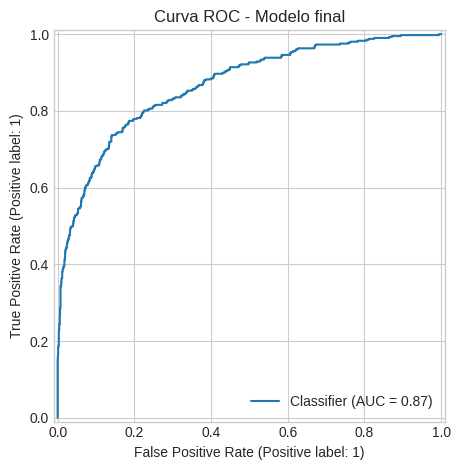


INTERPRETABILIDAD BÁSICA DEL MODELO


,importancia
age,0.377256
products_number,0.296794
active_member,0.116861
balance,0.064453
country_Germany,0.061523
balance_salary_ratio,0.025545
credit_score,0.018756
estimated_salary,0.015275
gender_Male,0.013245
tenure_age_ratio,0.007995


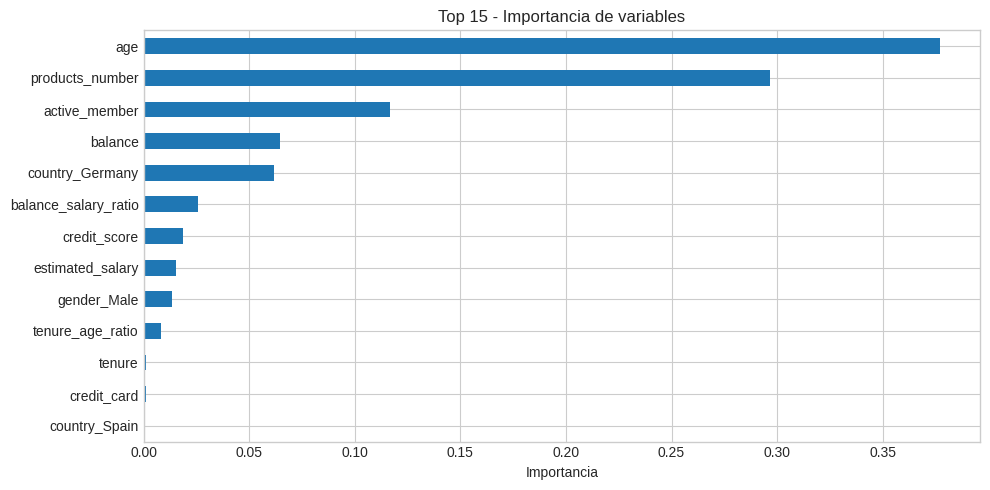


COMPARACIÓN OPCIONAL CON PCA (LOGISTIC REGRESSION)
ROC-AUC (PCA + LR): 0.7811
F1      (PCA + LR): 0.5060


In [6]:
# Librerías
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# -------------------------------------------------------------------------
# Inicialización (tomo el dataset transformado de la etapa 3)
# -------------------------------------------------------------------------
target_col = "churn"

try:
    df_model = df_final.copy()
except NameError:
    # Respaldo mínimo si no existe df_final en memoria
    df_tmp = pd.read_csv("Bank Customer Churn Prediction.csv")
    df_model = df_tmp.copy()

print("=" * 80)
print("ETAPA 4 - MINERÍA DE DATOS (MODELADO)")
print("=" * 80)
print(f"Dimensiones del dataset de entrada: {df_model.shape}")

# =============================================================================
# 4.1 Definición de variables (X, y) y partición Train/Test
# =============================================================================
print("\n" + "=" * 80)
print("DEFINICIÓN DE X, y Y PARTICIÓN TRAIN/TEST (ESTRATIFICADA)")
print("=" * 80)

if target_col not in df_model.columns:
    raise ValueError(f"No se encuentra la columna objetivo '{target_col}' en df_model.")

# Separo predictores y variable objetivo
X = df_model.drop(columns=[target_col])
y = df_model[target_col].astype(int)

# Particiono con estratificación para conservar proporción de clases en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print(f"Train: {X_train.shape} | Test: {X_test.shape}")
print("\nDistribución de clases (Train):")
display(y_train.value_counts().rename_axis(target_col).to_frame("frecuencia"))
print("\nDistribución de clases (Test):")
display(y_test.value_counts().rename_axis(target_col).to_frame("frecuencia"))

# =============================================================================
# 4.2 Entrenamiento de Modelos (baseline comparativo)
# =============================================================================
print("\n" + "=" * 80)
print("ENTRENAMIENTO Y COMPARACIÓN DE MODELOS")
print("=" * 80)

# Defino modelos base; uso class_weight cuando aplica para manejar desbalance sin SMOTE
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(
        n_estimators=300, random_state=42, n_jobs=-1, class_weight="balanced",
        max_depth=None, min_samples_split=2
    ),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

def _score_proba_or_decision(model, X_):
    # Extraigo una puntuación continua para ROC-AUC (proba si existe, si no decision_function)
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X_)[:, 1]
    if hasattr(model, "decision_function"):
        return model.decision_function(X_)
    # Si no hay score continuo, uso predicción binaria (menos ideal para ROC-AUC)
    return model.predict(X_)

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_score = _score_proba_or_decision(model, X_test)

    # Calculo métricas principales
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1  = f1_score(y_test, y_pred, zero_division=0)

    # ROC-AUC puede fallar si el score no es continuo; lo protejo
    try:
        auc = roc_auc_score(y_test, y_score)
    except Exception:
        auc = np.nan

    results.append({
        "Modelo": name,
        "Accuracy": round(acc, 4),
        "Precision": round(pre, 4),
        "Recall": round(rec, 4),
        "F1": round(f1, 4),
        "ROC_AUC": round(auc, 4) if pd.notnull(auc) else np.nan
    })

results_df = pd.DataFrame(results).sort_values(["ROC_AUC", "F1"], ascending=False)
display(results_df)

best_model_name = results_df.iloc[0]["Modelo"]
best_model = models[best_model_name]

print(f"\nModelo seleccionado por desempeño: {best_model_name}")

# =============================================================================
# 4.3 Validación Cruzada (estimación más estable del desempeño)
# =============================================================================
print("\n" + "=" * 80)
print("VALIDACIÓN CRUZADA (STRATIFIED K-FOLD)")
print("=" * 80)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Uso ROC-AUC como métrica primaria si el modelo lo soporta; si no, uso F1
scoring_metric = "roc_auc" if best_model_name in ["LogisticRegression", "DecisionTree", "RandomForest"] else "f1"

cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring=scoring_metric, n_jobs=-1)
print(f"Métrica CV ({scoring_metric}) - mean: {cv_scores.mean():.4f} | std: {cv_scores.std():.4f}")
print("Scores CV:", np.round(cv_scores, 4))

# =============================================================================
# 4.4 Ajuste de Hiperparámetros (mejora aplicada del bloque de ejercicios)
# =============================================================================
print("\n" + "=" * 80)
print("AJUSTE DE HIPERPARÁMETROS (RANDOMIZEDSEARCHCV)")
print("=" * 80)

tuned_model = None

# Ajuste ligero solo para RandomForest y LogisticRegression, manteniendo eficiencia
if best_model_name == "RandomForest":
    param_dist = {
        "n_estimators": [200, 300, 500],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2", None]
    }

    rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")
    search = RandomizedSearchCV(
        rf, param_distributions=param_dist,
        n_iter=20, cv=cv, scoring="roc_auc",
        random_state=42, n_jobs=-1, verbose=0
    )
    search.fit(X_train, y_train)
    tuned_model = search.best_estimator_

    print("Mejores hiperparámetros encontrados (RandomForest):")
    display(pd.Series(search.best_params_).to_frame("valor"))
    print(f"Mejor ROC-AUC CV: {search.best_score_:.4f}")

elif best_model_name == "LogisticRegression":
    param_dist = {
        "C": np.logspace(-3, 2, 20),
        "penalty": ["l2"],
        "solver": ["lbfgs", "liblinear"]
    }

    lr = LogisticRegression(max_iter=3000, class_weight="balanced", random_state=42)
    search = RandomizedSearchCV(
        lr, param_distributions=param_dist,
        n_iter=20, cv=cv, scoring="roc_auc",
        random_state=42, n_jobs=-1, verbose=0
    )
    search.fit(X_train, y_train)
    tuned_model = search.best_estimator_

    print("Mejores hiperparámetros encontrados (LogisticRegression):")
    display(pd.Series(search.best_params_).to_frame("valor"))
    print(f"Mejor ROC-AUC CV: {search.best_score_:.4f}")

else:
    print("Se mantiene el mejor modelo base (sin tuning) para evitar sobrecargar el flujo.")
    tuned_model = best_model

# =============================================================================
# 4.5 Evaluación Final del Modelo Seleccionado (Test)
# =============================================================================
print("\n" + "=" * 80)
print("EVALUACIÓN FINAL (TEST)")
print("=" * 80)

tuned_model.fit(X_train, y_train)
y_pred = tuned_model.predict(X_test)
y_score = _score_proba_or_decision(tuned_model, X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1  = f1_score(y_test, y_pred, zero_division=0)

try:
    auc = roc_auc_score(y_test, y_score)
except Exception:
    auc = np.nan

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1       : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}" if pd.notnull(auc) else "ROC-AUC  : N/A")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Real 0", "Real 1"], columns=["Pred 0", "Pred 1"])
print("Matriz de confusión:")
display(cm_df)

# Curva ROC (si aplica)
plt.figure(figsize=(7, 5))
try:
    RocCurveDisplay.from_predictions(y_test, y_score)
    plt.title("Curva ROC - Modelo final")
    plt.tight_layout()
    plt.show()
except Exception:
    print("No fue posible graficar ROC (score continuo no disponible).")

# =============================================================================
# 4.6 Interpretabilidad básica (importancias / coeficientes)
# =============================================================================
print("\n" + "=" * 80)
print("INTERPRETABILIDAD BÁSICA DEL MODELO")
print("=" * 80)

# Importancia de variables para modelos de árbol
if hasattr(tuned_model, "feature_importances_"):
    importances = pd.Series(tuned_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    display(importances.head(15).to_frame("importancia"))

    plt.figure(figsize=(10, 5))
    importances.head(15).sort_values().plot(kind="barh")
    plt.title("Top 15 - Importancia de variables")
    plt.xlabel("Importancia")
    plt.tight_layout()
    plt.show()

# Coeficientes para regresión logística
elif hasattr(tuned_model, "coef_"):
    coefs = pd.Series(tuned_model.coef_.ravel(), index=X_train.columns).sort_values(key=np.abs, ascending=False)
    display(coefs.head(15).to_frame("coeficiente"))

    plt.figure(figsize=(10, 5))
    coefs.head(15).sort_values().plot(kind="barh")
    plt.title("Top 15 - Coeficientes (magnitud)")
    plt.xlabel("Coeficiente")
    plt.tight_layout()
    plt.show()

else:
    print("El modelo no expone importancias/coeficientes de forma directa.")

# =============================================================================
# 4.7 (Opcional) Comparación rápida con PCA
# =============================================================================
print("\n" + "=" * 80)
print("COMPARACIÓN OPCIONAL CON PCA (LOGISTIC REGRESSION)")
print("=" * 80)

try:
    df_pca_work = df_pca.copy()
    Xp = df_pca_work.drop(columns=[target_col])
    yp = df_pca_work[target_col].astype(int)

    Xp_train, Xp_test, yp_train, yp_test = train_test_split(
        Xp, yp, test_size=0.20, random_state=42, stratify=yp
    )

    lr_pca = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
    lr_pca.fit(Xp_train, yp_train)

    yp_pred = lr_pca.predict(Xp_test)
    yp_score = lr_pca.predict_proba(Xp_test)[:, 1]

    auc_pca = roc_auc_score(yp_test, yp_score)
    f1_pca = f1_score(yp_test, yp_pred, zero_division=0)

    print(f"ROC-AUC (PCA + LR): {auc_pca:.4f}")
    print(f"F1      (PCA + LR): {f1_pca:.4f}")

except Exception as e:
    print("No se ejecuta la comparación con PCA (df_pca no disponible o error de ejecución).")
    print("Detalle:", str(e))

# **Etapa 5. Evaluación**
En esta etapa se valida el desempeño del modelo seleccionado con métricas, curvas y análisis por segmentos. También se ajusta el umbral de decisión para mejorar el balance entre precisión y recall, y se revisa calibración.

ETAPA 5 - EVALUACIÓN

MÉTRICAS PRINCIPALES (UMBRAL 0.50)


,Accuracy,Precision,Recall,F1,ROC_AUC
0,0.868,0.7918,0.4767,0.5951,0.8673



Reporte de clasificación (umbral 0.50):
              precision    recall  f1-score   support

           0     0.8786    0.9680    0.9211      1593
           1     0.7918    0.4767    0.5951       407

    accuracy                         0.8680      2000
   macro avg     0.8352    0.7223    0.7581      2000
weighted avg     0.8610    0.8680    0.8548      2000



<Figure size 600x500 with 0 Axes>

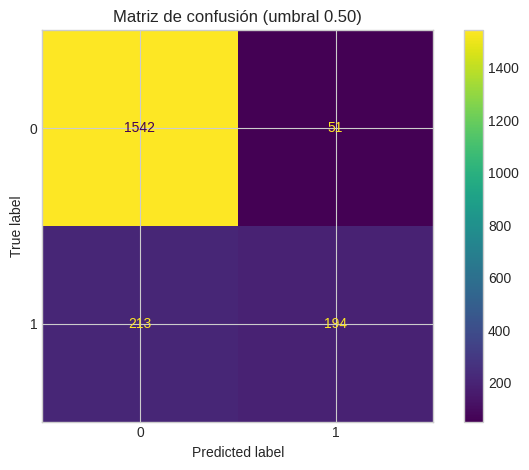


CURVAS ROC Y PRECISION-RECALL


<Figure size 650x500 with 0 Axes>

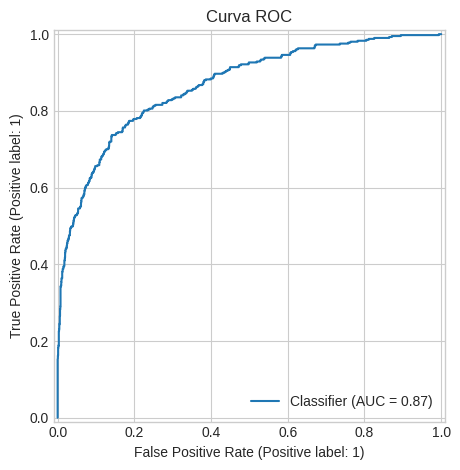

<Figure size 650x500 with 0 Axes>

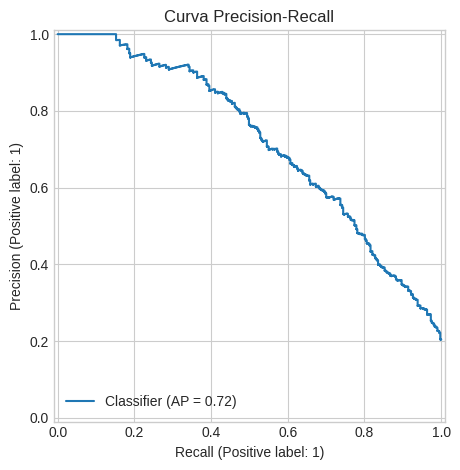


AJUSTE DE UMBRAL (MAXIMIZACIÓN DE F1 / YOUDEN J)
Mejor umbral por F1: 0.2295 | F1: 0.6438
Mejor umbral por Youden J: 0.2295 | J: 0.5959

Métricas con umbral optimizado por F1:


,Umbral,Accuracy,Precision,Recall,F1
0,0.2295,0.834,0.5714,0.7371,0.6438


<Figure size 600x500 with 0 Axes>

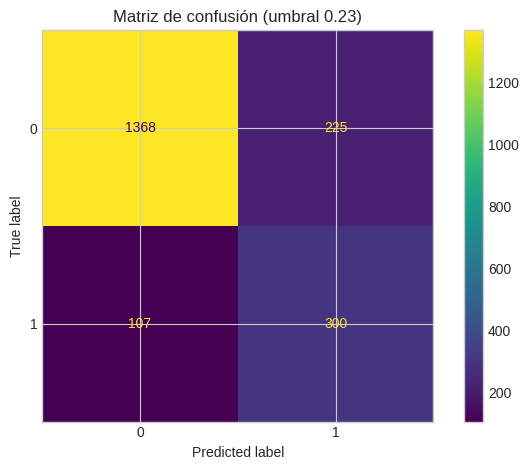

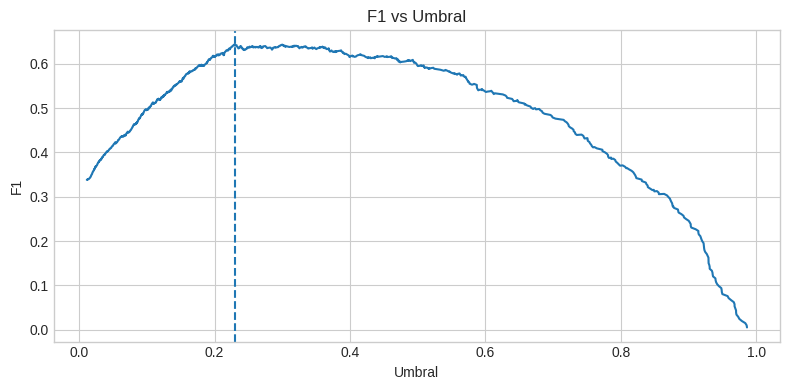


ANÁLISIS POR DECILES (LIFT)


,decil,n,churn,tasa_churn,score_prom,tasa_global,lift,churn_acum,captura_acum_%
0,D1,200,170,0.850,0.7927,0.2035,4.18,170,41.77
1,D2,200,88,0.440,0.4349,0.2035,2.16,258,63.39
2,D3,200,53,0.265,0.2487,0.2035,1.30,311,76.41
3,D4,200,26,0.130,0.1726,0.2035,0.64,337,82.80
4,D5,200,23,0.115,0.1280,0.2035,0.57,360,88.45
5,D6,200,17,0.085,0.0975,0.2035,0.42,377,92.63
6,D7,200,15,0.075,0.0743,0.2035,0.37,392,96.31
7,D8,200,5,0.025,0.0493,0.2035,0.12,397,97.54
8,D9,200,8,0.040,0.0305,0.2035,0.20,405,99.51
9,D10,200,2,0.010,0.0188,0.2035,0.05,407,100.00


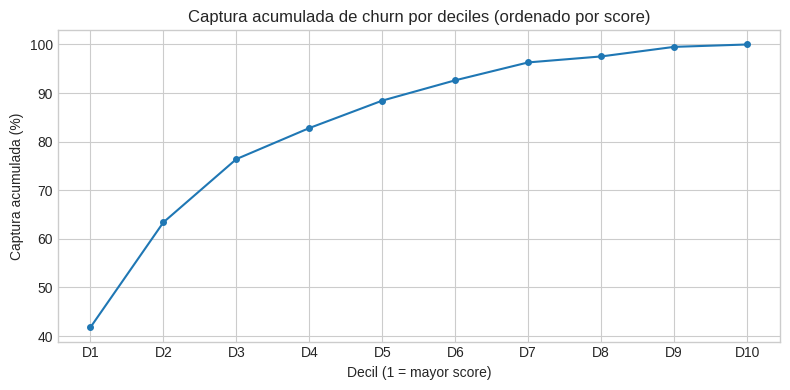


CALIBRACIÓN DEL MODELO


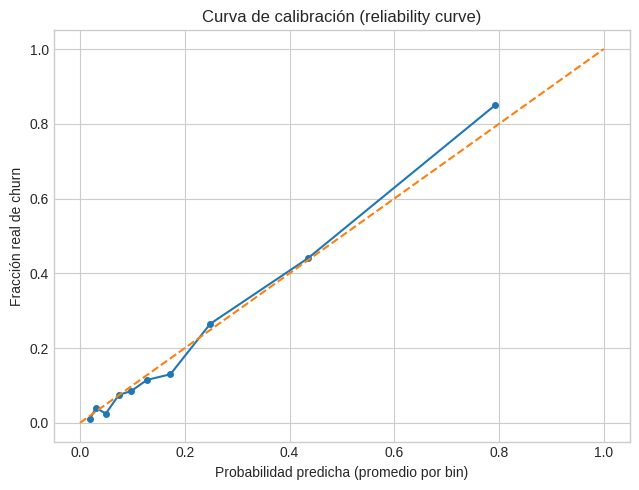

,prob_pred_prom,prob_real
0,0.0188,0.010
1,0.0305,0.040
2,0.0493,0.025
3,0.0743,0.075
4,0.0975,0.085
5,0.1280,0.115
6,0.1726,0.130
7,0.2487,0.265
8,0.4349,0.440
9,0.7927,0.850



RESUMEN COMPARATIVO DE UMBRALES


,Escenario,Umbral,Accuracy,Precision,Recall,F1,ROC_AUC
0,Umbral 0.50,0.5000,0.868,0.7918,0.4767,0.5951,0.8673
1,Umbral óptimo (F1),0.2295,0.834,0.5714,0.7371,0.6438,0.8673


In [7]:
# Librerías
from sklearn.metrics import (
    ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay,
    precision_recall_curve, roc_curve, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from sklearn.calibration import calibration_curve

# -------------------------------------------------------------------------
# Inicialización (tomo objetos de la etapa 4)
# -------------------------------------------------------------------------
print("=" * 80)
print("ETAPA 5 - EVALUACIÓN")
print("=" * 80)

# Verifico que existan variables clave; si faltan, detengo para evitar resultados inconsistentes
required_vars = ["tuned_model", "X_test", "y_test"]
missing = [v for v in required_vars if v not in globals()]

if missing:
    raise NameError(
        f"Faltan variables de la etapa 4: {missing}. "
        "Primero se requiere ejecutar la Etapa 4 para entrenar el modelo y generar X_test/y_test."
    )

# Extraigo score continuo para curvas (proba si existe, si no decision_function)
def _score_continuo(model, X_):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X_)[:, 1]
    if hasattr(model, "decision_function"):
        return model.decision_function(X_)
    return model.predict(X_)  # último recurso

y_score = _score_continuo(tuned_model, X_test)

# =============================================================================
# 5.1 Métricas de desempeño (umbral por defecto = 0.50)
# =============================================================================
print("\n" + "=" * 80)
print("MÉTRICAS PRINCIPALES (UMBRAL 0.50)")
print("=" * 80)

y_pred_05 = (y_score >= 0.50).astype(int)

acc_05 = accuracy_score(y_test, y_pred_05)
pre_05 = precision_score(y_test, y_pred_05, zero_division=0)
rec_05 = recall_score(y_test, y_pred_05, zero_division=0)
f1_05  = f1_score(y_test, y_pred_05, zero_division=0)

try:
    auc = roc_auc_score(y_test, y_score)
except Exception:
    auc = np.nan

metrics_05 = pd.DataFrame([{
    "Accuracy": round(acc_05, 4),
    "Precision": round(pre_05, 4),
    "Recall": round(rec_05, 4),
    "F1": round(f1_05, 4),
    "ROC_AUC": round(auc, 4) if pd.notnull(auc) else np.nan
}])

display(metrics_05)

print("\nReporte de clasificación (umbral 0.50):")
print(classification_report(y_test, y_pred_05, digits=4))

# Matriz de confusión (umbral 0.50)
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_05, values_format="d")
plt.title("Matriz de confusión (umbral 0.50)")
plt.tight_layout()
plt.show()

# =============================================================================
# 5.2 Curvas ROC y Precision-Recall
# =============================================================================
print("\n" + "=" * 80)
print("CURVAS ROC Y PRECISION-RECALL")
print("=" * 80)

# Curva ROC
plt.figure(figsize=(6.5, 5))
try:
    RocCurveDisplay.from_predictions(y_test, y_score)
    plt.title("Curva ROC")
    plt.tight_layout()
    plt.show()
except Exception:
    print("No fue posible graficar ROC.")

# Curva Precision-Recall
plt.figure(figsize=(6.5, 5))
try:
    PrecisionRecallDisplay.from_predictions(y_test, y_score)
    plt.title("Curva Precision-Recall")
    plt.tight_layout()
    plt.show()
except Exception:
    print("No fue posible graficar Precision-Recall.")

# =============================================================================
# 5.3 Ajuste del umbral de decisión (mejora aplicada)
# =============================================================================
print("\n" + "=" * 80)
print("AJUSTE DE UMBRAL (MAXIMIZACIÓN DE F1 / YOUDEN J)")
print("=" * 80)

# precision_recall_curve retorna umbrales para puntos intermedios (len = n-1)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# F1 para cada umbral (se alinea con thresholds)
f1_scores = (2 * precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-12)
best_f1_idx = int(np.argmax(f1_scores))
best_thr_f1 = float(thresholds[best_f1_idx])
best_f1 = float(f1_scores[best_f1_idx])

# Youden J (sensibilidad + especificidad - 1) usando ROC
fpr, tpr, thr_roc = roc_curve(y_test, y_score)
youden_j = tpr - fpr
best_j_idx = int(np.argmax(youden_j))
best_thr_j = float(thr_roc[best_j_idx])
best_j = float(youden_j[best_j_idx])

print(f"Mejor umbral por F1: {best_thr_f1:.4f} | F1: {best_f1:.4f}")
print(f"Mejor umbral por Youden J: {best_thr_j:.4f} | J: {best_j:.4f}")

# Evalúo métricas con el mejor umbral por F1 (recomendado para balance de clases)
y_pred_best = (y_score >= best_thr_f1).astype(int)

acc_b = accuracy_score(y_test, y_pred_best)
pre_b = precision_score(y_test, y_pred_best, zero_division=0)
rec_b = recall_score(y_test, y_pred_best, zero_division=0)
f1_b  = f1_score(y_test, y_pred_best, zero_division=0)

metrics_best = pd.DataFrame([{
    "Umbral": round(best_thr_f1, 4),
    "Accuracy": round(acc_b, 4),
    "Precision": round(pre_b, 4),
    "Recall": round(rec_b, 4),
    "F1": round(f1_b, 4)
}])

print("\nMétricas con umbral optimizado por F1:")
display(metrics_best)

plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, values_format="d")
plt.title(f"Matriz de confusión (umbral {best_thr_f1:.2f})")
plt.tight_layout()
plt.show()

# Visualizo F1 vs umbral
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores)
plt.axvline(best_thr_f1, linestyle="--")
plt.title("F1 vs Umbral")
plt.xlabel("Umbral")
plt.ylabel("F1")
plt.tight_layout()
plt.show()

# =============================================================================
# 5.4 Análisis por deciles (lift / captación de churn)
# =============================================================================
print("\n" + "=" * 80)
print("ANÁLISIS POR DECILES (LIFT)")
print("=" * 80)

# Armo tabla de scoring
eval_df = pd.DataFrame({
    "y_real": y_test.values,
    "score": y_score
}).sort_values("score", ascending=False).reset_index(drop=True)

# Creo deciles (10 segmentos) de mayor a menor score
eval_df["decil"] = pd.qcut(eval_df.index + 1, 10, labels=[f"D{i}" for i in range(1, 11)])

decile_table = (
    eval_df.groupby("decil")
    .agg(
        n=("y_real", "size"),
        churn=("y_real", "sum"),
        tasa_churn=("y_real", "mean"),
        score_prom=("score", "mean")
    )
    .reset_index()
)

# Lift relativo: tasa decil / tasa global
tasa_global = eval_df["y_real"].mean()
decile_table["tasa_global"] = tasa_global
decile_table["lift"] = decile_table["tasa_churn"] / (tasa_global + 1e-12)

# Captura acumulada de churn (qué tanto se captura al priorizar los primeros deciles)
decile_table["churn_acum"] = decile_table["churn"].cumsum()
total_churn = eval_df["y_real"].sum()
decile_table["captura_acum_%"] = (decile_table["churn_acum"] / (total_churn + 1e-12) * 100).round(2)

# Formateo
decile_table["tasa_churn"] = decile_table["tasa_churn"].round(4)
decile_table["score_prom"] = decile_table["score_prom"].round(4)
decile_table["lift"] = decile_table["lift"].round(2)

display(decile_table)

# Gráfica de captura acumulada
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), decile_table["captura_acum_%"], marker="o", markersize=4)
plt.title("Captura acumulada de churn por deciles (ordenado por score)")
plt.xlabel("Decil (1 = mayor score)")
plt.ylabel("Captura acumulada (%)")
plt.xticks(range(1, 11), decile_table["decil"].values)
plt.tight_layout()
plt.show()

# =============================================================================
# 5.5 Calibración del modelo (confiabilidad del score)
# =============================================================================
print("\n" + "=" * 80)
print("CALIBRACIÓN DEL MODELO")
print("=" * 80)

# calibration_curve requiere probabilidades en [0,1]; si el score no está en ese rango, lo normalizo con sigmoid
# En la práctica, predict_proba ya cumple; decision_function puede no.
score_min, score_max = float(np.min(y_score)), float(np.max(y_score))
if score_min < 0 or score_max > 1:
    # Transformación logística simple para llevar a (0,1) sin re-entrenar
    y_score_cal = 1 / (1 + np.exp(-y_score))
else:
    y_score_cal = y_score.copy()

prob_true, prob_pred = calibration_curve(y_test, y_score_cal, n_bins=10, strategy="quantile")

plt.figure(figsize=(6.5, 5))
plt.plot(prob_pred, prob_true, marker="o", markersize=4)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("Curva de calibración (reliability curve)")
plt.xlabel("Probabilidad predicha (promedio por bin)")
plt.ylabel("Fracción real de churn")
plt.tight_layout()
plt.show()

cal_table = pd.DataFrame({
    "prob_pred_prom": np.round(prob_pred, 4),
    "prob_real": np.round(prob_true, 4)
})
display(cal_table)

# =============================================================================
# 5.6 Resumen final de evaluación (comparación umbral 0.50 vs umbral óptimo)
# =============================================================================
print("\n" + "=" * 80)
print("RESUMEN COMPARATIVO DE UMBRALES")
print("=" * 80)

summary = pd.DataFrame([
    {"Escenario": "Umbral 0.50", "Umbral": 0.50, "Accuracy": acc_05, "Precision": pre_05, "Recall": rec_05, "F1": f1_05, "ROC_AUC": auc},
    {"Escenario": "Umbral óptimo (F1)", "Umbral": best_thr_f1, "Accuracy": acc_b, "Precision": pre_b, "Recall": rec_b, "F1": f1_b, "ROC_AUC": auc}
]).round(4)

display(summary)
